In [50]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

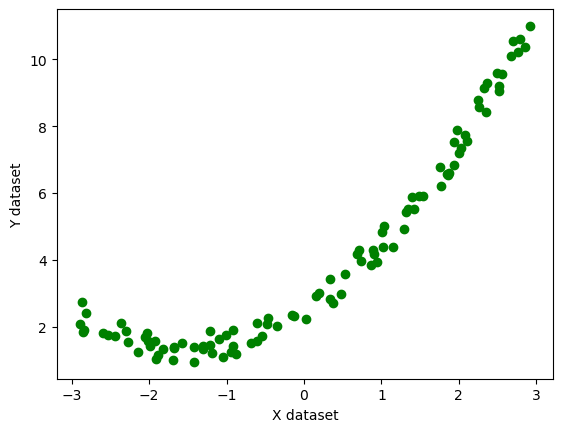

In [51]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.rand(100, 1)
plt.scatter(X, y, color = 'g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [52]:
X.shape

(100, 1)

In [53]:
y.shape

(100, 1)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
X_train.shape

(80, 1)

In [56]:
X_test.shape

(20, 1)

In [57]:
y_train.shape

(80, 1)

In [58]:
y_test.shape

(20, 1)

In [59]:
## Lets implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [60]:
regression_1.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred_1 = regression_1.predict(X_test)
y_pred_1

array([[2.96502707],
       [2.16145162],
       [5.96168382],
       [2.57275058],
       [2.21217737],
       [7.53926589],
       [6.90029334],
       [7.76057925],
       [6.28861477],
       [6.79397624],
       [8.12549295],
       [4.55915159],
       [0.96756789],
       [0.94753682],
       [7.51166204],
       [7.15320252],
       [2.6096345 ],
       [6.88683488],
       [1.16755323],
       [0.32613862]])

In [62]:
from sklearn.metrics import r2_score
sscore = r2_score(y_test, y_pred_1)

In [63]:
sscore

0.8877752179593351

Text(0, 0.5, 'Y')

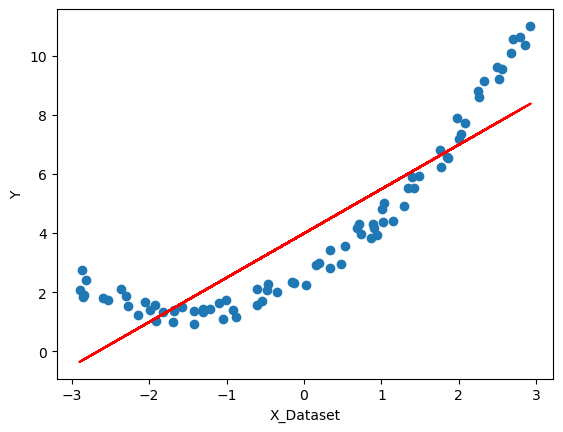

In [64]:
## Lets visualize this model
plt.plot(X_train, regression_1.predict(X_train), color = 'r')
plt.scatter(X_train, y_train)
plt.xlabel("X_Dataset")
plt.ylabel("Y")

In [65]:
# Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [66]:
poly = PolynomialFeatures(degree = 2, include_bias = True)

In [67]:
poly

PolynomialFeatures()

In [68]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [69]:
X_train_poly.shape

(80, 3)

In [70]:
X_test_poly.shape

(20, 3)

In [71]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)

In [72]:
y_test.shape

(20, 1)

In [73]:
X_test_poly.shape

(20, 3)

In [74]:
y_pred

array([[ 1.69307931],
       [ 1.38383506],
       [ 5.34070671],
       [ 1.50677714],
       [ 1.39499129],
       [ 8.84162391],
       [ 7.29227012],
       [ 9.41995861],
       [ 5.97666122],
       [ 7.05183282],
       [10.42040598],
       [ 3.14377061],
       [ 1.4467348 ],
       [ 1.45311628],
       [ 8.77099474],
       [ 7.88412698],
       [ 1.52142304],
       [ 7.26155992],
       [ 1.39266138],
       [ 1.73838568]])

In [75]:
score = r2_score(y_test, y_pred)

In [76]:
score

0.9905088779816472

In [77]:
print(regression.coef_)

[[0.         1.51277561 0.49180618]]


In [78]:
print(regression.intercept_)

[2.49737372]


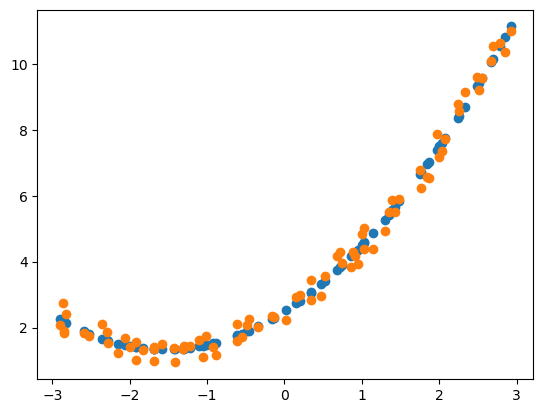

In [81]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [82]:
poly = PolynomialFeatures(degree = 3, include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [83]:
X_train_poly.shape

(80, 4)

In [84]:
X_test_poly.shape

(20, 4)

In [85]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.9905102051647667


In [86]:
# 3. prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)

In [88]:
X_new.shape

(200, 1)

In [90]:
X_new_poly = poly.transform(X_new)
X_new_poly.shape

(200, 4)

In [91]:
y_new = regression.predict(X_new_poly)

In [92]:
y_new.shape

(200, 1)

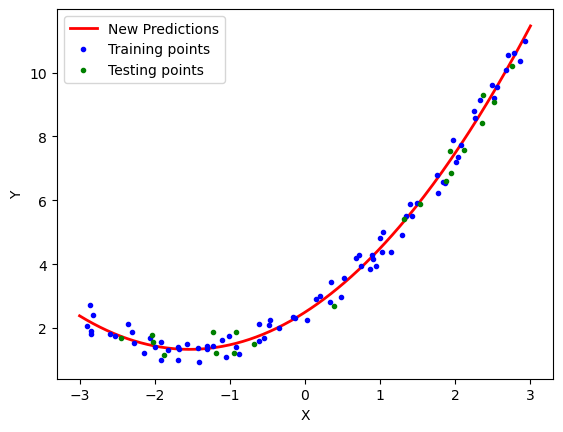

In [98]:
plt.plot(X_new, y_new, "r-", linewidth = 2, label = "New Predictions")
plt.plot(X_train, y_train, "b.", label = "Training points")
plt.plot(X_test, y_test, "g.", label = "Testing points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Pipeline Concepts

In [99]:
from sklearn.pipeline import Pipeline

In [101]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree = degree, include_bias = True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train) ## polynomial and fit of linear regression
    y_pred_new = poly_regression.predict(X_new)
    # plotting prediction line
    plt.plot(X_new, y_pred_new, 'r', label = "Degree" + str(degree), linewidth = 3)
    plt.plot(X_train, y_train, "b.", linewidth = 3)
    plt.plot(X_test, y_test, "g.", linewidth = 3)
    plt.legend(loc = "upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4, 4, 0, 10]) 
    plt.show()

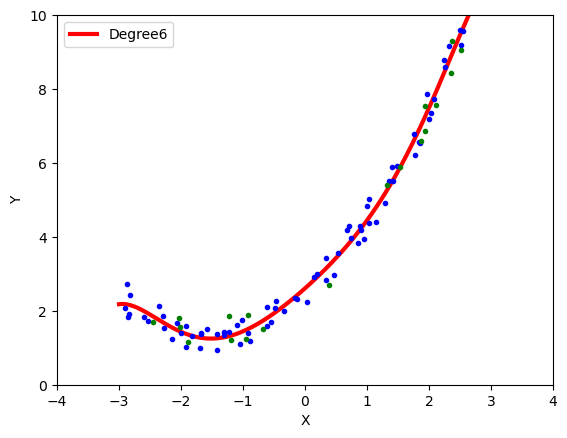

In [109]:
poly_regression(6)